### License
Copyright (c) 2022 Frederik Tørnstrøm (github.com/Frederik3152)

This software is provided 'as-is', without any express or implied warranty. In no event will the authors be held liable for any damages arising from the use of this software.

Permission is granted to anyone to use this software for any purpose, including commercial applications, and to alter it and redistribute it freely, subject to the following restrictions:

The origin of this software must not be misrepresented; you must not claim that you wrote the original software. If you use this software in a product, an acknowledgment in the product documentation would be appreciated but is not required.
Altered source versions must be plainly marked as such, and must not be misrepresented as being the original software.
This notice may not be removed or altered from any source distribution.

# Google Fit Data Science Project

#### After having suffered through the top of the COVID-19 pandemic like everyone else, I decided to make certain lifestyle changes in April of 2021. One such change came in the form of daily walks with the Google Fit application on my phone to track progress. Using this data, I wish to get more well-informed of my walking patterns and potentially how to improve it. Therefore, this **Data Science Project** aims to answer the following questions: 
1. What is the weekly distribution of walking distance and is there a difference in walking speed across the week?
2. Which weekday is the most common of not hitting the goal of 10,000 steps?
3. How has my walking pattern evolved over time?
4. What is the relationship between walking speed, walking distance and burned calories?


In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Reading the data
df = pd.read_csv('Daglige aktivitetsmetrics.csv')
df.head()

,Dato,Antal Aktive minutter,Kalorier (kcal),Distance (m),Hjertepoint,Hjerteminutter,Gennemsnitlig hastighed (m/s),Højeste hastighed (m/s),Laveste hastighed (m/s),Antal skridt,Varighed af Gang (ms)
0,2021-04-18,75,343.478060,6578.275240,72.0,72.0,1.177730,1.637091,0.899965,8929,4457538
1,2021-04-19,83,374.270038,7184.152761,76.0,76.0,1.375904,1.556015,0.999250,9714,4814070
2,2021-04-20,97,442.192014,8430.268541,93.0,93.0,1.298807,1.536944,1.035279,11456,5735337
3,2021-04-21,92,420.778736,7638.655426,82.0,82.0,1.232760,1.506219,0.859854,10526,5460719
4,2021-04-22,77,349.495775,6318.357475,71.0,71.0,1.228706,1.523291,0.924100,8726,4535634


### Data Cleaning

In [2]:
#Checking for null-values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Dato                           537 non-null    object 
 1   Antal Aktive minutter          537 non-null    int64  
 2   Kalorier (kcal)                537 non-null    float64
 3   Distance (m)                   537 non-null    float64
 4   Hjertepoint                    525 non-null    float64
 5   Hjerteminutter                 525 non-null    float64
 6   Gennemsnitlig hastighed (m/s)  537 non-null    float64
 7   Højeste hastighed (m/s)        537 non-null    float64
 8   Laveste hastighed (m/s)        537 non-null    float64
 9   Antal skridt                   537 non-null    int64  
 10  Varighed af Gang (ms)          537 non-null    int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 46.3+ KB


In [3]:
#Selecting the rows will null-values
df[df['Hjertepoint'].isna()]

,Dato,Antal Aktive minutter,Kalorier (kcal),Distance (m),Hjertepoint,Hjerteminutter,Gennemsnitlig hastighed (m/s),Højeste hastighed (m/s),Laveste hastighed (m/s),Antal skridt,Varighed af Gang (ms)
156,2021-09-21,50,227.490257,3099.399399,NaN,NaN,0.977478,1.109034,0.749428,4679,2952289
168,2021-10-03,72,313.537427,3709.711363,NaN,NaN,0.909755,1.094781,0.698981,5803,4068979
250,2021-12-24,49,215.275176,2442.065496,NaN,NaN,0.856339,1.082051,0.698811,3831,2793766
252,2021-12-26,29,134.095695,1584.302900,NaN,NaN,0.898883,1.042894,0.778123,2490,1740247
254,2021-12-28,72,321.538551,3952.580014,NaN,NaN,0.914791,1.008129,0.805725,6153,4172815
257,2021-12-31,105,470.835707,5421.142023,NaN,NaN,0.894639,1.030569,0.804943,8557,6110341
259,2022-01-02,49,220.988004,2672.496658,NaN,NaN,0.922749,1.054495,0.846771,4175,2867905
323,2022-03-07,54,243.073741,3015.699242,NaN,NaN,0.978016,1.289393,0.686496,4655,3154526
324,2022-03-08,47,207.095428,2504.506473,NaN,NaN,0.848028,1.094577,0.697518,3898,2687612
434,2022-06-26,80,368.293798,4306.277374,NaN,NaN,0.835109,1.012446,0.737157,6717,4779588


The null values in "Hjertepoint" and "Hjerteminutter" columns most likely comes from an error in the application used to calculate these health measures. To fill these values, different regression models will be trained and evaluated using the data with no missing values and thereafter applied to the missing rows:

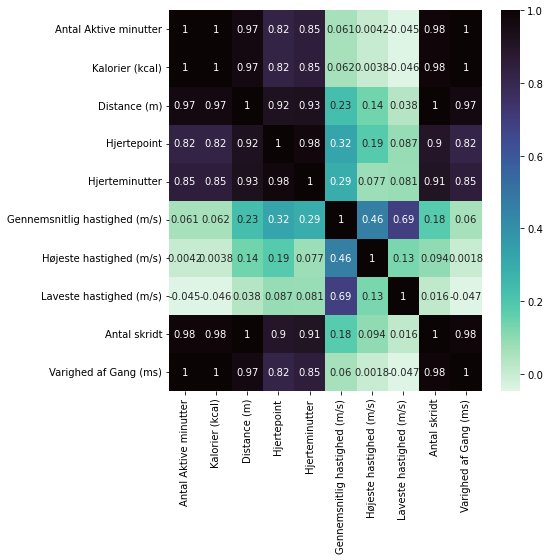

In [4]:
#Creating a heatmap of the correlation between attributes
plt.figure(figsize=(7,7)) 
sns.heatmap(df.corr(),annot=True,cmap='mako_r')
plt.show()

C:\Users\Frederik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.290e+04, tolerance: 1.151e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Frederik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.309e+04, tolerance: 1.151e+02
  model = cd_fast.enet_coordinate_descent(


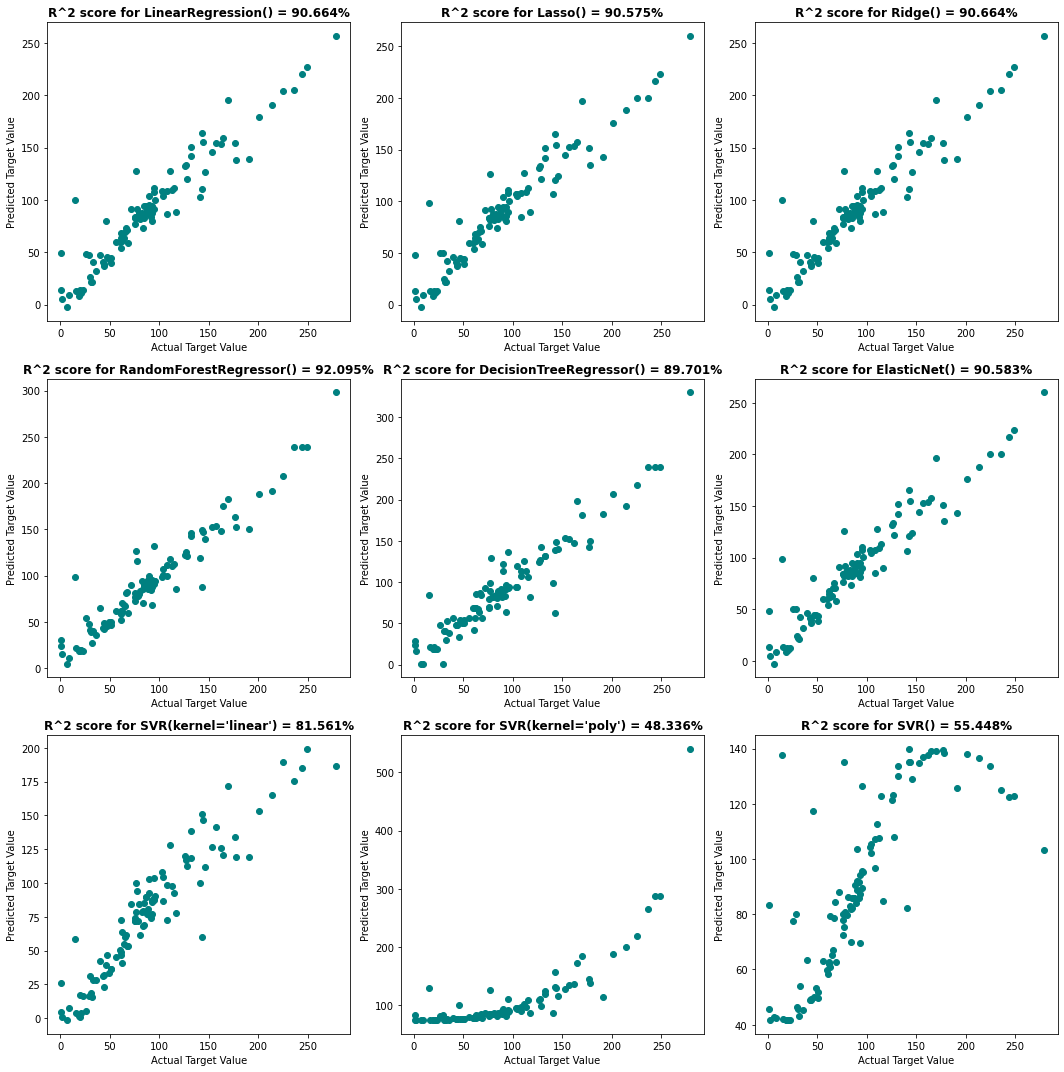

In [5]:
#Creating the dataframe using for training the regression model using the most correlated attributes
df_model = df[['Antal Aktive minutter', 'Kalorier (kcal)', 
               'Distance (m)', 'Antal skridt', 'Hjertepoint']].dropna()

#Importing regression libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from copy import deepcopy

#Creating the train and test features and output variables
train, test = train_test_split(df_model, test_size = 0.2, random_state = 50)
train_x = train[['Antal Aktive minutter', 'Kalorier (kcal)', 
                 'Distance (m)', 'Antal skridt']]
train_y = train.Hjertepoint
test_x = test[['Antal Aktive minutter', 'Kalorier (kcal)', 
               'Distance (m)', 'Antal skridt']]
test_y = test.Hjertepoint

def ml_regression_test(train_x, train_y, test_x, test_y, show_output=0, svr=1):
    #Creating a pipeline with each model that needs to be evaluated
    model_pipeline = []
    model_pipeline.append(LinearRegression())
    model_pipeline.append(Lasso())
    model_pipeline.append(Ridge())
    model_pipeline.append(RandomForestRegressor())
    model_pipeline.append(DecisionTreeRegressor())
    model_pipeline.append(ElasticNet())    
    if svr == 1:
        model_pipeline.append(SVR(kernel='linear'))
        model_pipeline.append(SVR(kernel='poly'))
        model_pipeline.append(SVR(kernel='rbf'))

    #Creating arrays to store the different values of model.fit, model.score and model.predict
    fitted_model_pipeline = []
    model_prediction = []
    model_accuracy = []
    #Fitting the models to the data and applying the algorithms to predict
    i = 0
    for model in model_pipeline:
        fitted_model_pipeline.append(model_pipeline[i].fit(train_x, train_y))
        model_prediction.append(fitted_model_pipeline[i].predict(test_x))
        model_accuracy.append(fitted_model_pipeline[i].score(test_x,test_y))
        i+= 1
                                     
    #Interpreting the accuracy of each model and plotting the predicted results
    i = 0
    plt.figure(figsize=(15,15))
    if show_output == 1:
        for model in model_pipeline:
            plt.subplot(3, 3, i+1)
            plt.tight_layout()
            plt.scatter(test_y, model_prediction[i], color = 'teal')
            plt.xlabel('Actual Target Value')
            plt.ylabel('Predicted Target Value')
            plt.title('R^2 score for {} = {}%'.format(
                model, (model_accuracy[i]*100).round(3)),fontweight='bold')
            i += 1 
        plt.show()
    #Determining the most accurate model according to the coefficient of determination 
    best_model = model_accuracy.index(max(model_accuracy))
    return deepcopy(fitted_model_pipeline[best_model])

#Creating the trained_regression_model variable to call the most accurate model disregarding random states
trained_regression_model= ml_regression_test(train_x, train_y, test_x, test_y, show_output=1, svr=1)

At  >90% accuracy, the model is accurate enough for this purpose.

In [6]:
#Using multiple filters to convert the missing data rows into same format as test_x
df_predict = df[['Antal Aktive minutter', 'Kalorier (kcal)',
                 'Distance (m)', 'Antal skridt', 'Hjertepoint']]
df_predict = df_predict[df_predict.isnull().any(axis=1)]
df_predict = df_predict[['Antal Aktive minutter', 'Kalorier (kcal)',
                         'Distance (m)', 'Antal skridt']]

#Using the trained regression model to predict missing values
predicted_hjertepoint = trained_regression_model.predict(df_predict).round(0)

#Adding the predicted values to the predict dataframe
df_predict['Hjertepoint'] = predicted_hjertepoint.tolist()
df_predict

,Antal Aktive minutter,Kalorier (kcal),Distance (m),Antal skridt,Hjertepoint
156,50,227.490257,3099.399399,4679,34.0
168,72,313.537427,3709.711363,5803,17.0
250,49,215.275176,2442.065496,3831,5.0
252,29,134.095695,1584.302900,2490,15.0
254,72,321.538551,3952.580014,6153,18.0
257,105,470.835707,5421.142023,8557,37.0
259,49,220.988004,2672.496658,4175,9.0
323,54,243.073741,3015.699242,4655,26.0
324,47,207.095428,2504.506473,3898,7.0
434,80,368.293798,4306.277374,6717,23.0


In [7]:
#Adding the predicted values to the main dataframe and making sure that "Hjerteminutter" follows the values
for i in df_predict.index:
    df.at[i, 'Hjertepoint'] = df_predict.at[i, 'Hjertepoint']
    df.at[i, 'Hjerteminutter'] = df.at[i, 'Hjertepoint']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Dato                           537 non-null    object 
 1   Antal Aktive minutter          537 non-null    int64  
 2   Kalorier (kcal)                537 non-null    float64
 3   Distance (m)                   537 non-null    float64
 4   Hjertepoint                    537 non-null    float64
 5   Hjerteminutter                 537 non-null    float64
 6   Gennemsnitlig hastighed (m/s)  537 non-null    float64
 7   Højeste hastighed (m/s)        537 non-null    float64
 8   Laveste hastighed (m/s)        537 non-null    float64
 9   Antal skridt                   537 non-null    int64  
 10  Varighed af Gang (ms)          537 non-null    int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 46.3+ KB


### Exploratory Data Analysis

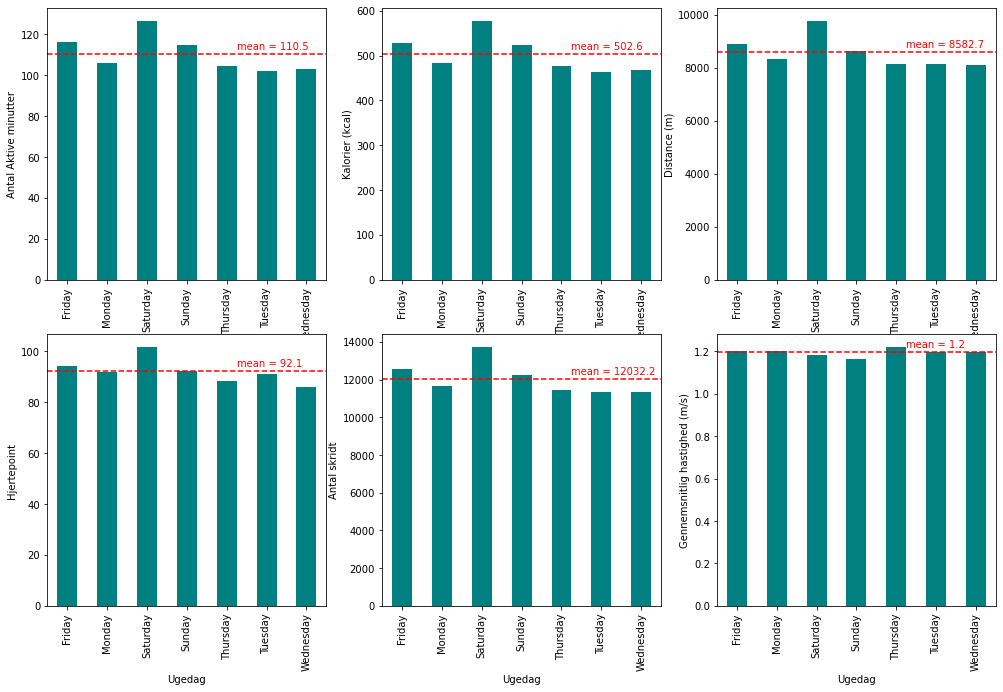

In [8]:
#Adding an additional column with the weekday, by first converting the "Dato" column to datetime datatype
df['Dato'] = pd.to_datetime(df['Dato'])
df['Ugedag'] = df['Dato'].dt.day_name()

#Using the "Ugedag" column to plot the average attributes across the week
attribute_weekday = ['Antal Aktive minutter', 'Kalorier (kcal)', 
                    'Distance (m)', 'Hjertepoint', 'Antal skridt', 
                    'Gennemsnitlig hastighed (m/s)']

plt.figure(figsize=(17,17))
i=0
for attribute in attribute_weekday:
    plt.subplot(3, 3, i+1)
    df.groupby(df['Ugedag'])[attribute].mean().plot(kind='bar', color = 'teal')
    plt.ylabel(attribute)
    plot_mean = np.nanmean(df[attribute])
    plt.axhline(y=plot_mean, linestyle = '--', color = 'r')
    plt.text(4.25,plot_mean+(plot_mean*0.02), 'mean = {}'.format(plot_mean.round(1)), color ='r')
    i += 1
plt.show()

All charts look similar, showing an expected linearity between the attributes. The main takeaway is that the weekends (fridays, saturdays and sundays) have walking trips that are longer than the average, with saturdays being about 1.3 km longer than the average. The average walking speed is more or less the same across all weekdays at about 1.2 meter per second ≈ 4.3 kilometers per hour.

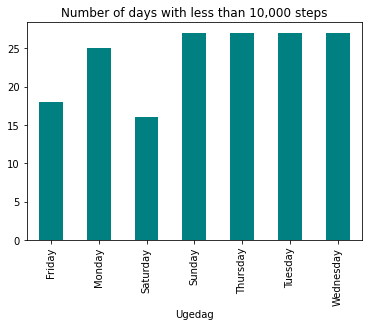

In [9]:
#Filtering and visualizing the number of days with less than 10000 steps 
df[df['Antal skridt'] < 10000].groupby(df['Ugedag'])['Antal skridt'].count().plot(kind='bar', color = 'teal')
plt.title('Number of days with less than 10,000 steps')
plt.show()

As seen in above chart, tuesday, wednesday, thursday and sunday all share the same number of days where I hit less than 10,000 steps. This is surprising, as I hypothesized that mondays, being right after the weekend, would be severely ahead. Additionally, it is clear that it is much easier to reach the target during the weekends where I have more time. This indicates that busyness / time must be a main factor in determining my ability to walk long-distance.

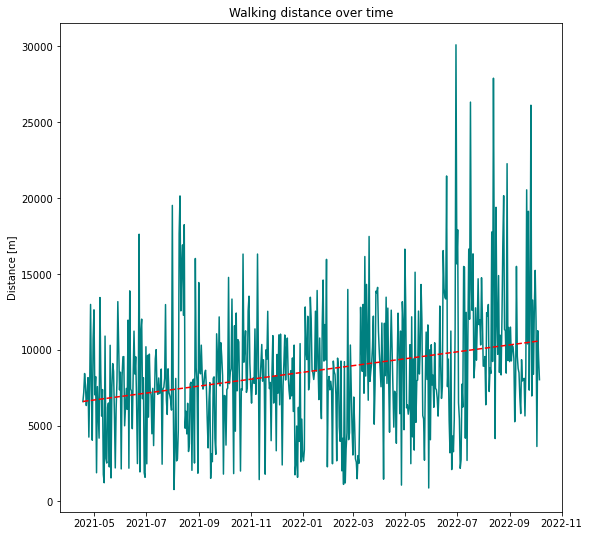

The slope of the trendline is 7.45 meaning that the average walking distance per day has increased 4.0 kilometers


In [10]:
#Importing the matplotlib "dates" library, to gain access to the date2num function
import matplotlib.dates as dates

#Preparing the plot and creating variables from dataframe
plt.figure(figsize=(9,9))
x = df['Dato']
y = df['Distance (m)']

#Converting dates to numpy array and calculate the best fit trendline for the converted data
converted_x = dates.date2num(x)
fit = np.poly1d(np.polyfit(converted_x, y, 1))
fitted_x = np.linspace(converted_x.min(), converted_x.max())

#Creating the plot with data and trendline
plt.plot(x,y, color = 'teal')
plt.plot(fitted_x, fit(fitted_x), 'r--')

#Adding plot title and label
plt.title('Walking distance over time')
plt.ylabel('Distance [m]')
plt.show()

#Calculating the slope of the trendline
slope = np.polyfit(converted_x,y,1)[0].round(2)
increase = ((slope*x.count())/1000).round(2)
print('The slope of the trendline is {} meaning that the average walking distance per day has increased {} kilometers'
      .format(slope, increase))

As the linear trendline implies, my walking distance has generally increased over time, and the average walk is 4 kilometers longer in october 2022 than in april 2021. Additionally, there are way more extreme outliers in the later half of 2022 than in 2021, again implying longer walks and greater ability to dedicate more time and energy to the walks. 

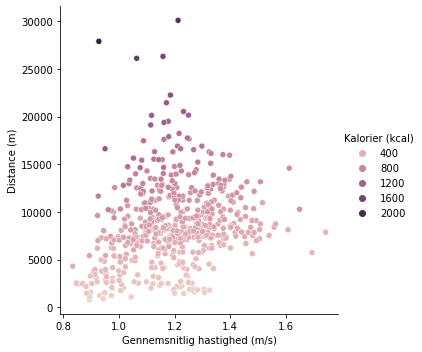

In [11]:
#Plotting the relationship between walking distance, walking speed and calories burned
sns.relplot(x ='Gennemsnitlig hastighed (m/s)', y ='Distance (m)',
            hue ='Kalorier (kcal)', data = df);

From the 'triangle' shape of the above chart, it is clear that there is not a direct correlation between the three attributes, and that they are affected by other features that the app records. This could be height and weight, but since these are not logged with the activitymetrics data, it is impossible to be sure. 

### Conclusion
The exploratory data analysis proves that my walks have evolved a lot over time, and that the average walk is 4 kilometers longer today than when I first started. Over the whole period, I have generally walked more in the weekend, but I  keep the same pace of roughly 4.3 km/h throughout the entire week. This tells me that the limiting factor, determining the distance I am able to walk, is time. Furthermore, the collected data was not enough to accurately simulate the algorithm that the sensor use to calculate burned calories, as this requires more data in the form of weight, height etc.

#### What I have learned: 
- How to use machine learning to assist with missing data
- How to build a function that evaluates different machine learning models
- How to apply a fitted and trained model in a real scenario
- How to create and interpret trendlines over time
- How to determine linearity between attributes